# <span style="color:#1111AA">Modulation: Amplitude Modulation</span>

# Table of Contents

# 1. Overview

## 1.1. Introduction

Amplitude modulation is used to encode information as a time dependent amplitude of a carrier wave. The technique is most famously known for being used for radio broadcasting. 

When we use photo diodes to measure a laser field, power is what we measure. In the field of gravitational waves the carrier frequency is way to high for a photo diode to meausre sub-period power, thus, the measurable quantity is "slowly" varying amplitude modulation. Both phase and frequency modulation need to be converted into amplitude modulation to be detectable. 

This session will introduce the basics of amplitude modulation, and show how we simulate it with FINESSE using the sideband picture.

## 1.2. Prerequisites and reading material

We recommend that you have done the following notebooks before starting this one:
* 01_Introduction
    * 01_Ipython_notebook
        * [01_Ipython_notebook](../../01_Introduction/01_Ipython_notebook/01_Ipython_notebook.ipynb)
    * 02_Finesse
        * [01_Introduction](../../01_Introduction/02_Finesse/01_Introduction.ipynb)
    * 03_Pykat
        * [01_Introduction](../../01_Introduction/03_Pykat/01_Introduction.ipynb)
        * [02_Plotting_Examples](../../01_Introduction/03_Pykat/02_Plotting_Examples.ipynb)

or have corresponding basic experience of Ipython notebooks, PyKat, and Finesse. The links above only works if you started ipython notebook in the top directory of this course.

**Reading material and references:**

[1] [A. Freise, K. Strain, D. Brown, and C. Bond, "Interferometer Techniques for Gravitational-Wave Detection", *Living Reviews in Relativity* **13**, 1 (2010)](http://arxiv.org/pdf/0909.3661v3). - Living review article (more like a book) on laser interferometry in the frequency domain for detecting gravitational waves, and FINESSE.

[2] [A. Freise, D. Brown, and C. Bond, "Finesse, Frequency domain INterferomEter Simulation SoftwarE"](http://kvasir.sr.bham.ac.uk/redmine/attachments/download/131/Finesse_2.0_manual.pdf). - FINESSE-manual

[3] [FINESSE syntax reference](http://www.gwoptics.org/finesse/reference/) - Useful online syntax reference for FINESSE. Also available in the Finesse manual [2], but this online version is updated more frequently.

## 1.3. After this session you will...

* be able to use an Electro-Optic Modulator to amplitude modulate an optical field in FINESSE.
* have seen that FINESSE uses the sideband picture to represent amplitude modulated fields.
* be able to tell if the DC-power decreases or not as the modulation index increases for amplitude modulation

# 2. Optical amplitude modulation

## 2.1. Importing packages

Importing python and PyKat packages that we will need, and setting up how to display figures.

In [2]:
import numpy as np                         # Importing numpy
import matplotlib                          # Importing matplotlib, so we can plot figures
import matplotlib.pyplot as plt                   
from pykat import finesse                  # Importing the pykat.finesse package
from pykat.commands import *               # Importing all packages in pykat.commands.
from IPython.display import display, HTML  # Allows us to display HTML.

# Telling the notebook to make plots inline.
%matplotlib inline      
# Initialises the PyKat plotting tool. Change the dpi value to adjust size of figures on your screen.
pykat.init_pykat_plotting(dpi=90)          

                                              ..-
    PyKat 1.0.4           _                  '(
                          \`.|\.__...-""""-_." )
       ..+-----.._        /  ' `            .-'
   . '            `:      7/* _/._\    \   (
  (        '::;;+;;:      `-"' =" /,`"" `) /
  L.        \`:::a:f            c_/     n_'
  ..`--...___`.  .    ,  
   `^-....____:   +.      www.gwoptics.org/pykat



## 2.2. Amplitude modulation

In amplitude modulation, a signal is encoded in the amplitude of a carrier field. Suppose we have a carrier field $E_c(t) = E_0\cos\big(2\pi f_\mathrm{c} t + \varphi_c \big)$, where $E_0$ is the amplitude, $f_c$ is the frequency and $\varphi_c$ is a phase term. Furthermore, suppose that the signal that is amplitude modulated onto the carrier field is $x(t) = m\sin(2\pi f_\mathrm{m} t + \varphi_\mathrm{m})$, then the modulated field is described by 

\begin{align}
E(t) = E_0\cos \big( 2\pi f_\mathrm{c} t + \varphi_c \big) \big( 1 + m\sin(2\pi f_\mathrm{m} t + \varphi_\mathrm{m}) \big).
\end{align}

Here, the *modulation frequency* $f_\mathrm{m}$ determines how quickly the amplitude changes, the *modulation index* $m$ determines how large the ampliutude flucuations are, and the *modulation phase* $\varphi_\mathrm{m}$ is a constant phase term of the signal. Note that this equation requires an active element performing the modulation since the amplitude sometimes is larger than the initial carrier amplitude, thus energy must have been added. For passive amplitude modulation, this expression can be used instead

\begin{align}
E(t) = E_0\cos \big( 2\pi f_\mathrm{c} t + \varphi_c \big) \Big( 1 - \frac{m}{2}\big(1 -  \sin(2\pi f_\mathrm{m} t + \varphi_\mathrm{m}) \big) \Big).
\end{align}

For amplitue modulation, the modulation index must be between 0 and 1, where 1 corresponds to the instantaneous amplitude reaching down to zero at the minimum.


## 2.3 Example code visualising amplitude modulation

We can see an example of passive amplitude modulation below, where the figure is generated by using a carrier frequency $f_c = 20$ Hz, a modulation frequency $f_{\mathrm{m}} = 2$ Hz, and a modulation index $m=0.9$. Normally $f_{m} << f_c$, but for visualising purposes we exaggerate the modulation frequency. Both the overall phase term $\varphi_c$ and the modulation phase term $\varphi_\mathrm{m}$ are set to zero. Feel free to play around with the parameters and the code to see what happens.

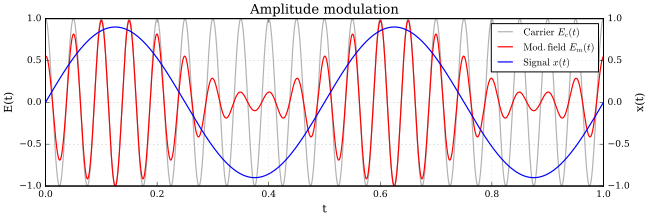

In [3]:
## Code for showing a phase modulated field ##

# Parameters
# --------------------------------------------------
t = np.linspace(0,1,2048)   # Time array
E0 = 1                      # Amplitude of the field.
fc = 20                     # Carrier freq
phi_c = 0                   # Phase of the field
fm = 2                      # Phase modulation freq
m = 0.9                     # Modulation index [0,1]
phi_m = 0                   # Modulation phase

# Computing the fields and signal arrays
# --------------------------------------------------
# Carrier field
E = E0*np.cos(fc*2*np.pi*t + phi_c)
# Signal 
x = m*np.sin(fm*2*np.pi*t + phi_m)
# Phase modulated field
E_m = E0*np.cos(fc*2*np.pi*t + phi_c)*(1 - (m/2)*(1-np.sin(fm*2*np.pi*t+phi_m) ))

# Plotting
# --------------------------------------------------
fig = plt.figure(figsize=(10,3))

# Axis for carrier and modulated field
ax = plt.subplot(1,1,1)
p1 = ax.plot(t,E,'0.7', label='$\mathrm{Carrier}\ E_c(t)$')
p2 = ax.plot(t,E_m,'r',label='$\mathrm{Mod. field}\ E_m(t)$')
ax.set_xlabel('t')
ax.set_ylabel('E(t)')
ax.set_title('Amplitude modulation')
ax.set_xlim(-0.01,1.01)

# Second y-axis for signal
ax2 = ax.twinx()
p3 = ax2.plot(t,x,'b', label='$\mathrm{Signal}\ x(t)$')
ax2.set_ylabel('x(t)')

# The legend
plots = p1+p2+p3
labs = [lab.get_label() for lab in plots]
ax.legend(plots, labs, loc=1, fontsize=10)

# Showing figure
plt.show(fig)

<font size="2"> **Figure.** The figure shows an amplitude modulated field $E_m(t) = E_0\cos\big(2\pi f_\mathrm{c} t + \varphi_c \big) \Big( 1 - \frac{m}{2}\big(1 -  \sin(2\pi f_\mathrm{m} t + \varphi_\mathrm{m}) \big) \Big)$ in red, the carrier field $E_c(t) = E_0\cos (2\pi f_\mathrm{c} t)$ in grey, and the signal $x(t) = m \sin(2\pi f_\mathrm{m} t + \varphi_m)$ in blue.

In the figure above we can clearly see that (i) the amplitue of the modulated field oscillated, and (ii) that the phase and frequency are kept constant. These are two important characteristics of a purely amplitude modulated field.

## 2.4. Amplitude modulation in the sideband picture

Using complex notation, an amplitude modulated field at an arbitrary fixed point in space can be described by

\begin{align}
E_\mathrm{m}(t) = E_0\exp \Big(i\big( 2\pi f_\mathrm{c} t \big) \Big)\Big( 1 - \frac{m}{2}\big(1 -  \sin(2\pi f_\mathrm{m} t + \varphi_\mathrm{m}) \big) \Big) ,
\end{align}

where the constant phase term of the carrier $\varphi_c$ has been absorbed into the now complex amplitude $E_0$. By using the Euler identity $\sin(\phi) = \big( \mathrm{e}^{i\phi}-\mathrm{e}^{-i\phi}\big) /2i$, we can write this as 

\begin{align}
E_\mathrm{m}(t) =& E_0\mathrm{e}^{2\pi i f_\mathrm{c} t} 
                   \bigg[ 1 - \frac{m}{2} - \frac{im}{4} 
                       \Big( \mathrm{e}^{i ( 2\pi f_\mathrm{m} t + \varphi_\mathrm{m} )} - 
                           \mathrm{e}^{-i ( 2\pi f_\mathrm{m} t + \varphi_\mathrm{m})} 
                       \Big)
                   \bigg] \\
                =& a_0 \mathrm{e}^{2\pi i f_c t} + a_- \mathrm{e}^{2\pi i f_- t} + a_+ \mathrm{e}^{2\pi i f_+ t} ,
\end{align}

where $f_\pm = f_c \pm f_m$. So for amplitude modulation, we always get exactly one pair of sidebands, as seen in the figure below. This is in contrast to the many sideband pairs we end up with for phase and frequency modulation. For more reading about amplitude modulation, see section 3.4 in the living review article [1]. 

<img src="am_sidebands.png" style="width: 500px;"/>

<font size="2">**Figure.** The figure shows an amplitude modulated field in the frequency domain, where the carrier is in read and the sidebands are in blue. </font>

An import fact to note, but that is however very hard to see from this equation, is that both sidebands are aligned (same phase) with the carrier simultaneously, as well as antialigned a half-period later. This means that they will periodically add and subtract real amplitude from the total field, which is exactly what amplitude modulation means. In comparison, for frequency and phase modulation, one sideband is aligned with the carrier as its partner sideband is anti-aligned, which means they effecectily cancelling each other out leaving the real part of the amplitude unchanged. See section 3.5. in the living review article [1] for a nice explanation of this using phasor diagrams.

## 2.5 Finesse model and example

In this example we use a laser and an *Electro-Optic Modulator* (EOM, keyword `mod`) to show how the amplitude of the carrier and the sidebands varies with the modulation index $m$. The setup can be seen in the figure below. We use *amplitude detectors* (keyword `ad`) to look at the ampitude of the frequency components. Amplitude detectors does not exist, but a nice property of numerical models is that we can make impossible "measurements".

<img src="phase_modulation.png" style="width: 400px;"/>

<font size="2">**Figure.** The figure shows the setup used in this session. The component names match the FINESSE model created below. </font>

We start by bulding the base model:

In [9]:
basekat = finesse.kat()          # Initialising Finesse
basekat.verbose = False          # Tells Finesse to talk less

# Finesse code
code = """
## The optical system ##
l laser 1 0 n0                # 1 W laser with 0 offset wavelength (thus default 1064nm used)
s s1 1 n0 n1                  # Space from laser to mirror (1 m)
mod eom 1k 0.3 1 am 0 n1 n2   # Modulator (f=1 kHz, m=0.3, 1 sideband pair, phase modulation, 0 degree mod. phase)
s s2 1000 n2 n3               # Space from modulator to output (1 m)
"""

# Parsing the Finesse code
basekat.parseKatCode(code)

Now we add the amplitude detectors, and specify what we want to simulate, and run the simulation:

In [57]:
kat1 = deepcopy(basekat)

code = """
## Detectors ##
ad car 0 n3                   # Ampitude dector for the carrier (0 freq offset)
ad sb 1k n3                   # Ampitude dector for the upper sideband (1 kHz freq offset)

## Instructions ##
xaxis eom midx lin 0 1 200   # Varying the modulation index of the modulator between 0 and 1.
yaxis abs                    # Showing amplitude of the frequncy components.
"""

# Parsing the code and running the simulation
kat1.parseCommands(code)
out1 = kat1.run()

Plotting the simulation results:

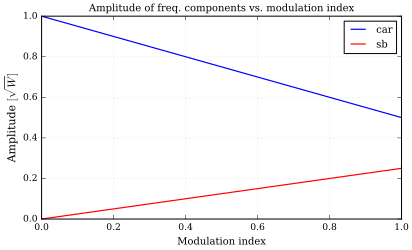

In [58]:
# Only plotting the 
fig1 = out1.plot(title = 'Amplitude of freq. components vs. modulation index', 
                 ylabel='Amplitude $[\sqrt{W}]$',  
                 xlabel='Modulation index')

In the figure we see that, as the modulation index increases, more and more amplitude is taken from the carrier and fed into the sideband.

# 3. Tasks

## 3.1. Conservation of energy

Use the example above as a base and modify it to investigate if the total power is conserved while varying the modulation index.

** Answer: **

# 4. Tasks with answers

## 4.1. Conservation of energy

Use the example above as a base and modify it to investigate if the total power is conserved while varying the modulation index.

** Answer: **

The important parts to remember here are
* that we need to use the lower sideband as well (which was excluded in the example above) 
* that amplitude in Finesse is in the unit $\sqrt{\mathrm{W}}$ 
* how to compute the DC-power, see the beginning of section 4 in the living review article [1]

We also add a photo diode to detect the power to see if there is a difference compared to square the absolute sum of amplitudes. 

In [71]:
# Copying our core model
kat2 = deepcopy(basekat)

# Adding detectors and instructions
code = """
## Detectors ##
ad car 0 n3                   # Ampitude dector for the carrier (0 freq offset)
ad up 1k n3                   # Ampitude dector for the upper sideband (1 kHz freq offset)
ad low -1k n3                 # Ampitude dector for the upper sideband (-1 kHz freq offset)

pd pow n3                     # Photo diode to detect DC-power (actually photo diode + low pass filter)

## Instructions ##
xaxis eom midx lin 0 1 200   # Varying the modulation index of the eom between 0 and 1.
yaxis abs                    # Returns absolute values of the complex amplitudes
"""

# Parsing the code and running the simulation
kat2.parseKatCode(code)
out2 = kat2.run()

Now we compute the total DC-power by squaring the amplitudes of the frequency components, and summing over them:

In [64]:
# Resulting fields and power
# ----------------
# Carrier only
P_c = out2['car']**2
# With one sideband pair
P_tot = (out2['car']**2 + out2['up']**2 + out2['low']**2)
# With only the sidebands
P_sb = (out2['up']**2 + out2['low']**2)

Plotting the results:

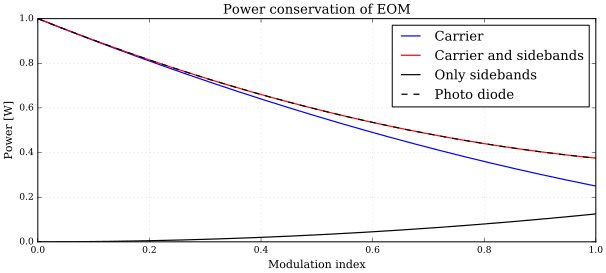

In [77]:
# Plotting
# ---------
fig2 = plt.figure(figsize=(10,4))
ax = plt.subplot(1,1,1)
ax.plot(out2.x, P_c, label='Carrier')
ax.plot(out2.x, P_tot, label='Carrier and sidebands')
ax.plot(out2.x, P_sb, label = 'Only sidebands')
ax.plot(out2.x, out2['pow'], 'k--', label='Photo diode')
# Labels and legend
ax.set_title('Power conservation of EOM')
ax.set_ylabel('Power [W]')
ax.set_xlabel('Modulation index')
ax.legend(loc=1)
plt.show(fig2)

As wee see in the figure above, the total field loses more and more power with increasing modulation index when using the passive amplitude modulation provided by the EOM. This means that the stronger the modulation, the larger part of the amplitude is fluctuating, which leaves a smaller DC-part. We can also see that we obtain the same result as with a photo diode when taking into account all three frequency components.

# 5. Summary

In this session we have:
* used an electro-optic modulator to amplitude modulate a laser field
* seen that an amplitude modulated field can be described by adding two sidebands around the carrier
* investigated what happens with the total DC-power as the modulation index grows

In the [next session](03_Optical_beat.ipynb) we will look into what an optical beat is, which is very much related to amlitude modulation.